## Problem Statement:
   Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.


   A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
-  Which variables are important to predict the price of variable?
-  How do these variables describe the price of the house?

### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [537]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [538]:
#importing dataset
train_data= pd.read_csv('train.csv')
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [539]:
test_data= pd.read_csv('test.csv')
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [540]:
#adding training and testing data for preprocessing
data= pd.concat([train_data,test_data],ignore_index=True)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN
1456,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
1457,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN
1458,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,10

In [541]:
#shape of the dataset
print(f"There are {data.shape[0]} Entries and {data.shape[1]} variables in the dataset.")

There are 1460 Entries and 81 variables in the dataset.


In [542]:
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- There are around 1460 observation(rows) and 80 features and 1 target variable.
- Categorical variables need to be encoded.

In [543]:
#dropping the Salesprice from the dataset since its the target variable
data.drop(columns='SalePrice',inplace=True)
data.shape

(1460, 80)

In [544]:
#checking if there's any missing values in the datset
nullval=[]
nullcol=[]
for column in data:
    if data[column].isnull().sum() != 0:
        nullval.append(data[column].isnull().sum())
        nullcol.append(column)
        
pd.DataFrame({'Columns with null values':nullcol,'Number of null values':nullval})

,Columns with null values,Number of null values
0,LotFrontage,259
1,Alley,1369
2,MasVnrType,8
3,MasVnrArea,8
4,BsmtQual,37
5,BsmtCond,37
6,BsmtExposure,38
7,BsmtFinType1,37
8,BsmtFinType2,38
9,Electrical,1


These are the columns which has missing values and number of missing values present in each column.
we need to do something about the null values.

In [545]:
#to see the unique values of each columns to understand 
data.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

In [546]:
#Missing values
#Some missisng values are rectified from understanding the data description given
#LotFrontage is Linear feet of street connected to property thus replacing with median
data["LotFrontage"].fillna(data.LotFrontage.median(),inplace=True)

#Alley has some null values which means that there are no alley in those property
data["Alley"].fillna("No",inplace=True)

#Masvnrtype and masvnrarea is replaced with mode and median function
data["MasVnrType"].fillna(data.MasVnrType.mode()[0],inplace=True)
data["MasVnrArea"].fillna(data.MasVnrArea.median(),inplace=True)

#some houses have no basement which is represented as Na
data["BsmtQual"].fillna("No_base",inplace=True)
data["BsmtCond"].fillna("No_base",inplace=True)
data["BsmtExposure"].fillna("No_base",inplace=True)
data["BsmtFinType1"].fillna("No_base",inplace=True)
data["BsmtFinType2"].fillna("No_base",inplace=True)

#Electrical has one null value which will be replaced with mode function
data["Electrical"].fillna(data.Electrical.mode()[0],inplace=True)

#some house have no fire place whih is represented as na
data["FireplaceQu"].fillna("No",inplace=True)

#some house have no garage whih is represented as na
data["GarageType"].fillna("No",inplace=True)
data["GarageYrBlt"].fillna(0.,inplace=True)
data["GarageFinish"].fillna("No",inplace=True)
data["GarageQual"].fillna("No",inplace=True)
data["GarageCond"].fillna("No",inplace=True)

#most house have no pool,fence and Miscellaneous feature whih is represented as na
data["PoolQC"].fillna("No",inplace=True)
data["Fence"].fillna("No",inplace=True)
data["MiscFeature"].fillna("No",inplace=True)

In [547]:
#checking if there's still any missing values
nullval=[]
nullcol=[]
for column in data:
    if data[column].isnull().sum() != 0:
        nullval.append(data[column].isnull().sum())
        nullcol.append(column)
        
pd.DataFrame({'Columns with null values':nullcol,'Number of null values':nullval})

,Columns with null values,Number of null values


There are no missing values in the datset. we now will understand the the relationship with the feautres of the dataset.

In [548]:
#descriptive statistics
pd.set_option('display.max_columns',None)
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


- Id is just for reference purpose it does not give any insights on Sales Price.
- Most of the features have values NO and 0 in their entries.
- Categorical variable has to be rectified.

In [549]:
#dropping the above mentions column
data.drop(columns='Id',inplace= True)
data.shape

(1460, 79)

In [550]:
##Relationship between feature and target variable
#separating numerical and categorical features for EDA
categorical_data=data.select_dtypes(include=object)
numerical_data=data.select_dtypes(include=np.number)

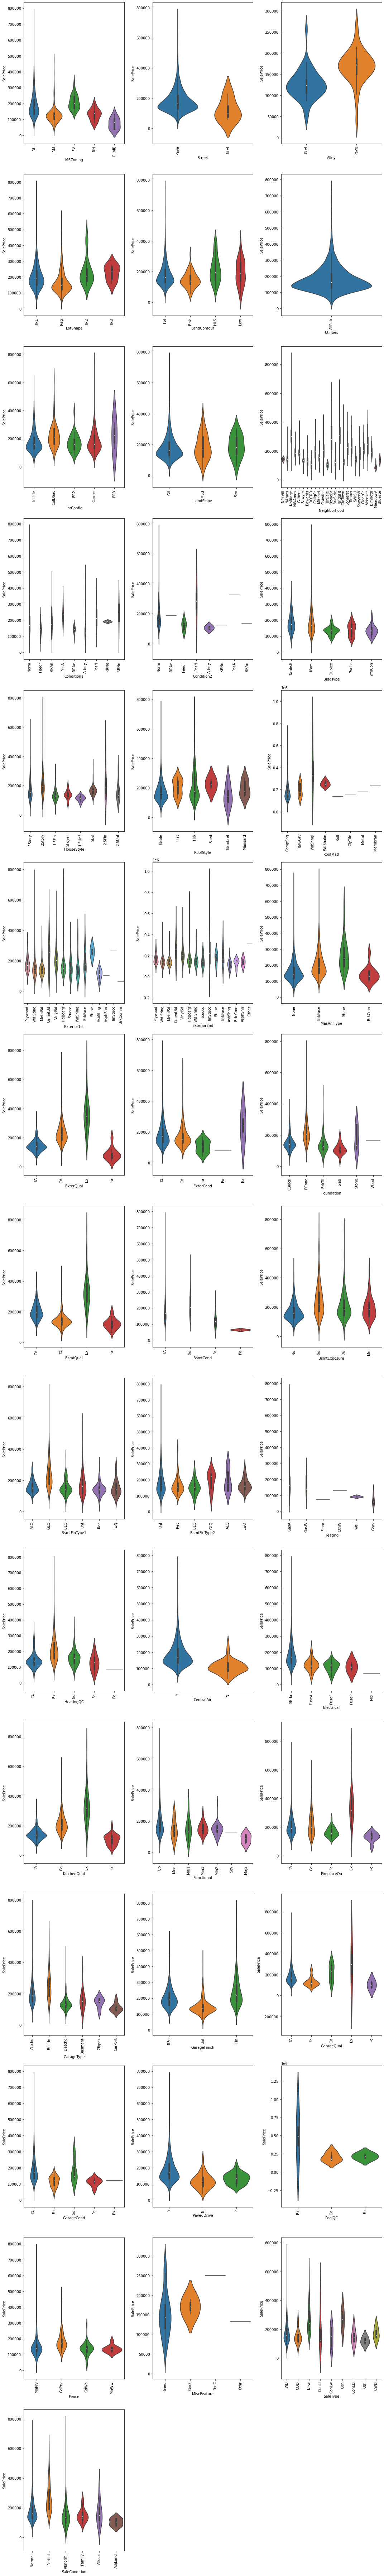

In [567]:
#Relationship between feature and target variable
#categorical variables
plt.figure(figsize=(15,100),facecolor='white')
plotnumber=1
for column in categorical_data.columns:
    plt.subplot(15,3,plotnumber)
    sns.violinplot(x=column,y='SalePrice',data=train_data)
    plt.xticks(rotation=90)
    plotnumber+=1

plt.tight_layout()
plt.show()

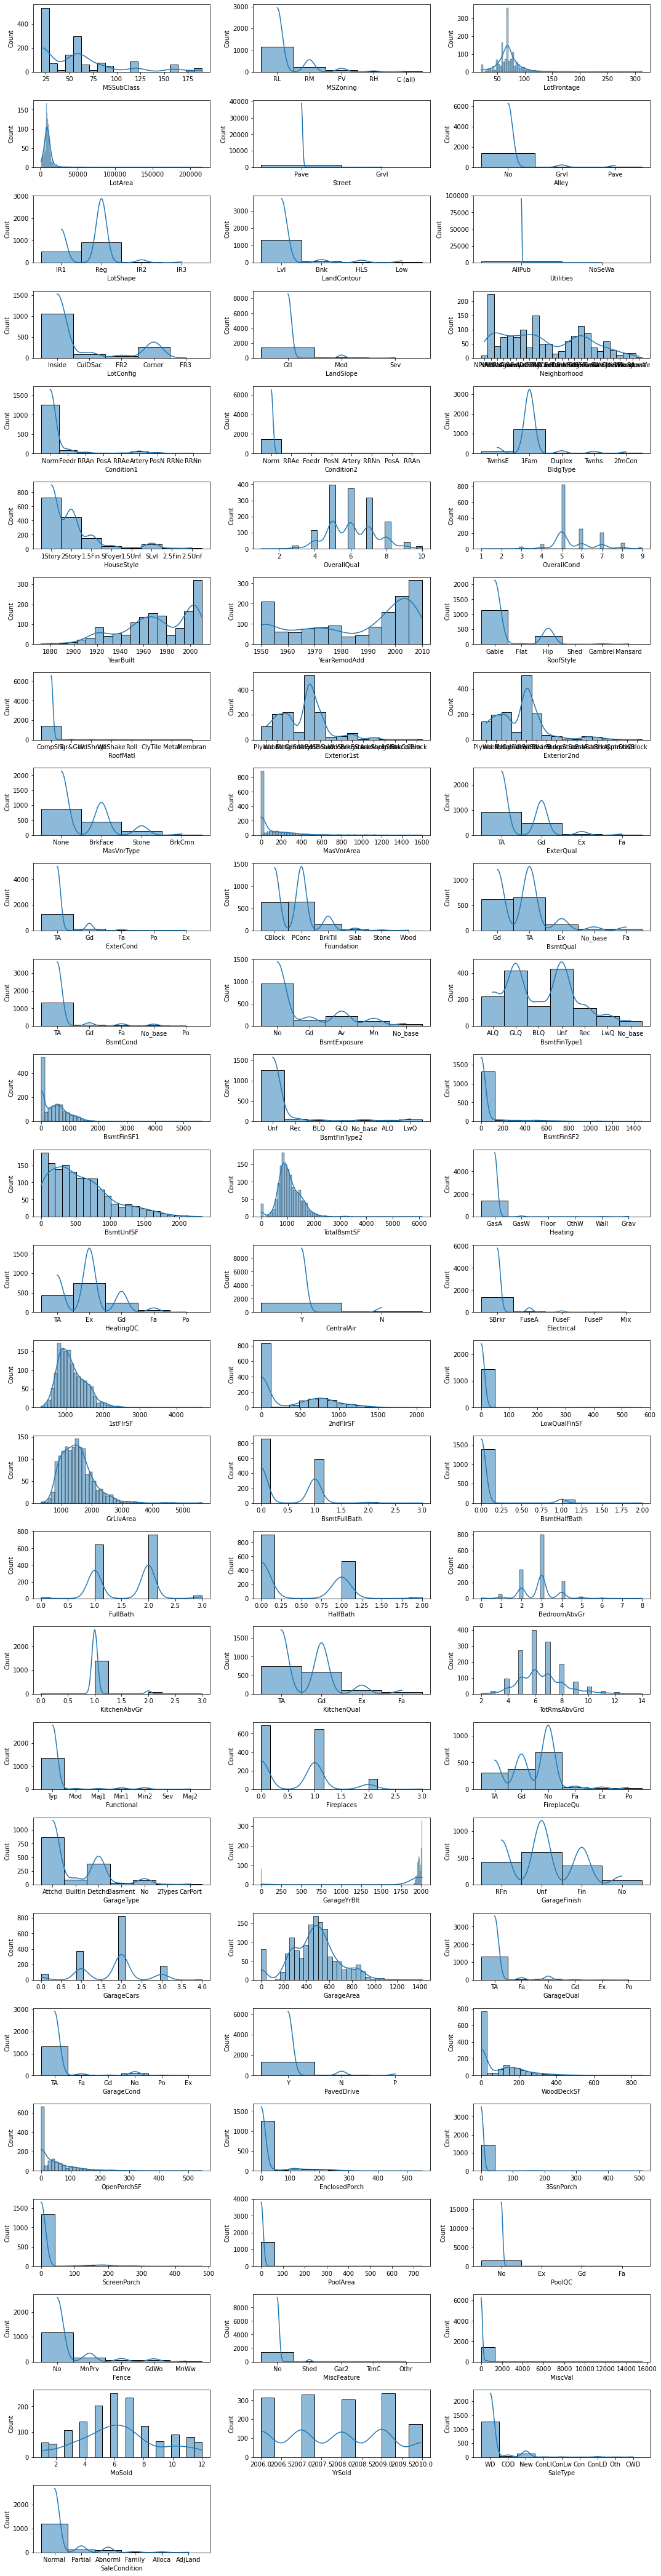

In [566]:
#distribution of each features
plt.figure(figsize=(15,60),facecolor='white')
plotnumber=1
for column in data.columns:
    plt.subplot(28,3,plotnumber)
    sns.histplot(x=column,data=data,kde=True)
    plotnumber+=1
plt.tight_layout()
plt.show()

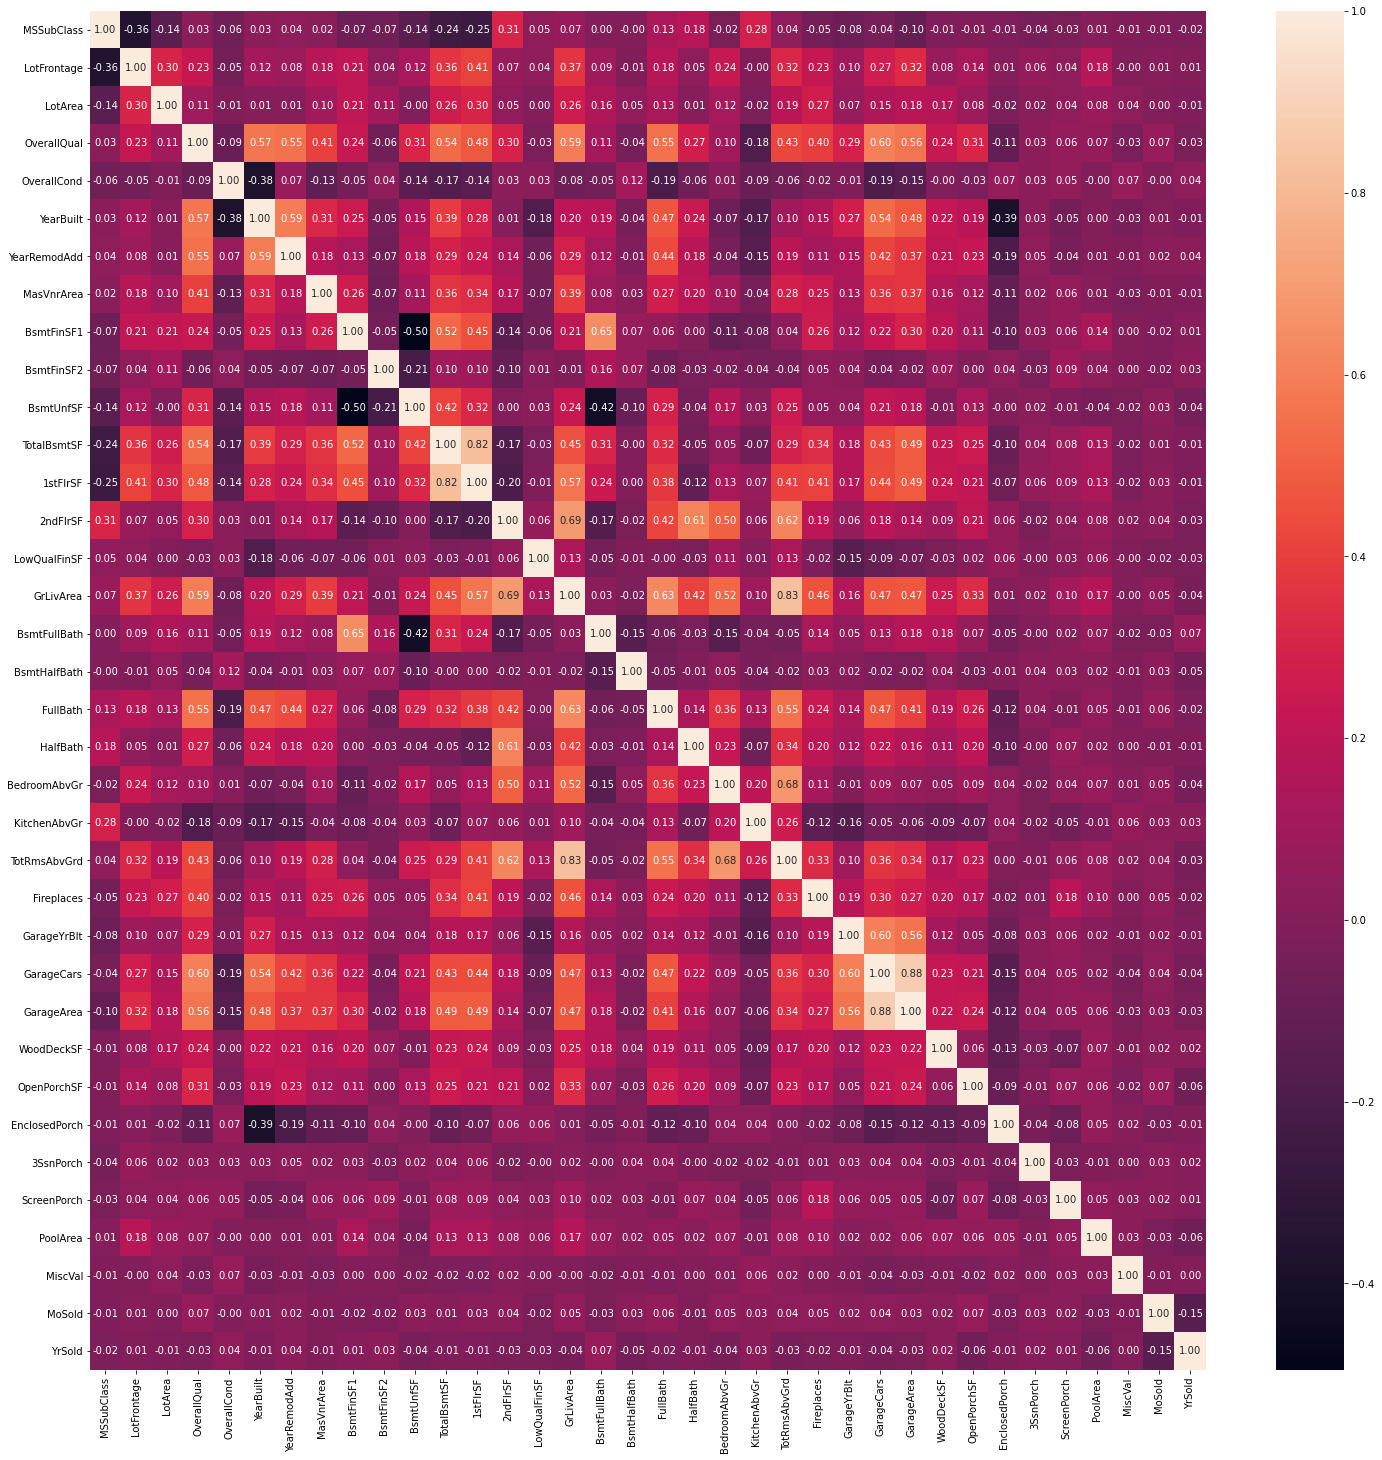

In [569]:
#checking the multicollinearity between the features
corr_data= data.corr()

plt.figure(figsize=(25,25),facecolor='white')
sns.heatmap(corr_data,annot=True,fmt='.2f')
plt.show()

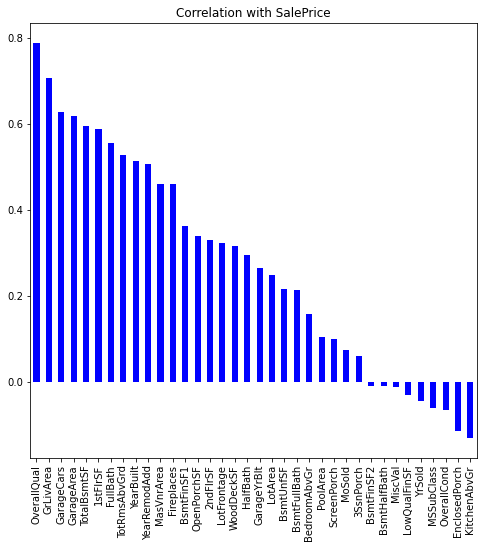

In [572]:
#correlation with the target with target variable
plt.figure(figsize=(8,8),facecolor='white')
data.corrwith(train_data.SalePrice).sort_values(ascending=False).plot(kind='bar',color='b',title='Correlation with SalePrice')
plt.show()

These are the order of each features correlation with the target variable.

In [573]:
#checking skewness of numercial features in the dataset
numerical_data.head()
#skewness of the numerical features
numerical_data.skew().sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.677616
LotFrontage       2.409147
OpenPorchSF       2.364342
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -3.869501
dtype: float64

In these variables there are some categorical features and there are some high skew in the datset.

In [574]:
#reducing the skewness of the variables using powertransformer.
from sklearn.preprocessing import PowerTransformer
skewness= PowerTransformer()
numerical_data= pd.DataFrame(skewness.fit_transform(numerical_data),columns=numerical_data.columns)
numerical_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.363243,0.047023,-1.173387,-0.042192,-0.477387,0.006695,-0.621670,-0.818452,-0.121931,-0.359384,0.917141,0.106028,-0.439387,-0.871454,-0.134652,-1.207966,-0.838866,-0.243940,0.797246,-0.773692,-1.062477,-0.172658,-0.947362,0.784005,0.231787,0.273835,-0.094779,-0.950337,1.415905,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,-1.694229,-0.613715
1,-1.164269,1.168177,1.086704,1.350924,0.440551,-0.206089,-0.863478,-0.818452,0.389438,2.783698,1.043860,2.398091,2.146981,-0.871454,-0.134652,1.308777,1.175573,-0.243940,0.797246,-0.773692,1.382874,-0.172658,0.946380,0.784005,0.196077,0.273835,0.697262,0.803933,1.420557,-0.407595,-0.129279,3.403869,-0.069409,-0.192177,1.320258,-0.613715
2,0.493460,1.048715,0.169184,0.667499,-0.477387,0.822814,0.494025,-0.818452,0.926686,-0.359384,-0.520777,0.192669,0.074892,1.177232,-0.134652,1.018578,1.175573,-0.243940,0.797246,1.284128,0.170752,-0.172658,0.946380,0.784005,0.334750,0.273835,-0.027076,1.059652,1.198532,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,-0.068307,-0.613715
3,-1.164269,1.551331,0.498627,-0.042192,0.440551,0.043505,-0.578466,1.383065,0.796641,-0.359384,1.180581,1.691727,1.593768,-0.871454,-0.134652,0.755102,-0.838866,-0.243940,0.797246,-0.773692,0.170752,-0.172658,0.389921,0.784005,0.231787,0.273835,0.375207,-0.950337,1.168365,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,-2.176773,1.643336
4,-1.164269,0.047023,1.180052,-0.042192,1.263440,0.043505,0.694898,1.142674,1.181146,-0.359384,-0.238207,1.213523,1.165811,-0.871454,-0.134652,0.332686,-0.838866,4.099375,0.797246,-0.773692,0.170752,-0.172658,0.946380,0.784005,0.231787,0.273835,0.301080,1.148270,-1.071307,-0.407595,-0.129279,-0.293785,-0.069409,-0.192177,-0.068307,0.892349


In [575]:
numerical_data.skew()

MSSubClass        0.069019
LotFrontage       0.167283
LotArea           0.026569
OverallQual       0.018233
OverallCond       0.032376
YearBuilt        -0.134920
YearRemodAdd     -0.225561
MasVnrArea        0.426258
BsmtFinSF1       -0.411401
BsmtFinSF2        2.425650
BsmtUnfSF        -0.274971
TotalBsmtSF       0.232534
1stFlrSF         -0.001106
2ndFlrSF          0.280724
LowQualFinSF      7.299413
GrLivArea         0.000171
BsmtFullBath      0.360390
BsmtHalfBath      3.859402
FullBath         -0.049435
HalfBath          0.521435
BedroomAbvGr      0.123625
KitchenAbvGr     -2.800950
TotRmsAbvGrd      0.001879
Fireplaces        0.083549
GarageYrBlt      -3.791474
GarageCars       -0.024840
GarageArea       -0.328235
WoodDeckSF        0.132275
OpenPorchSF      -0.014772
EnclosedPorch     2.047941
3SsnPorch         7.613746
ScreenPorch       3.113266
PoolArea         14.352680
MiscVal           5.016528
MoSold           -0.039399
YrSold            0.093295
dtype: float64

The skewness has been reduced. Now we need to update it in the original dataset. Before replacing the less skewed data. lets scale the numerical features to a standart range.

In [576]:
#scaling
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
numerical_data= pd.DataFrame(scalar.fit_transform(numerical_data),columns=numerical_data.columns)

In [577]:
#replacing the less skewd data to the original dataset.
for column in numerical_data.columns:
    data[column]=numerical_data[column]
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.363243,RL,0.047023,-1.173387,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,-0.042192,-0.477387,0.006695,-0.621670,Gable,CompShg,Plywood,Plywood,None,-0.818452,TA,TA,CBlock,Gd,TA,No,ALQ,-0.121931,Unf,-0.359384,0.917141,0.106028,GasA,TA,Y,SBrkr,-0.439387,-0.871454,-0.134652,-1.207966,-0.838866,-0.243940,0.797246,-0.773692,-1.062477,-0.172658,TA,-0.947362,Typ,0.784005,TA,Attchd,0.231787,RFn,0.273835,-0.094779,TA,TA,Y,-0.950337,1.415905,-0.407595,-0.129279,-0.293785,-0.069409,No,No,No,-0.192177,-1.694229,-0.613739,WD,Normal
1,-1.164269,RL,1.168177,1.086704,Pave,No,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,1.350924,0.440551,-0.206089,-0.863478,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,-0.818452,Gd,Gd,PConc,TA,Gd,Gd,ALQ,0.389438,Rec,2.783698,1.043860,2.398091,GasA,Ex,Y,SBrkr,2.146981,-0.871454,-0.134652,1.308777,1.175573,-0.243940,0.797246,-0.773692,1.382874,-0.172658,Gd,0.946380,Typ,0.784005,TA,Attchd,0.196077,Unf,0.273835,0.697262,TA,TA,Y,0.803933,1.420557,-0.407595,-0.129279,3.403869,-0.069409,No,No,No,-0.192177,1.320258,-0.613739,WD,Normal
2,0.493460,RL,1.048715,0.169184,Pave,No,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,0.667499,-0.477387,0.822814,0.494025,Gable,CompShg,MetalSd,MetalSd,None,-0.818452,Gd,TA,PConc,Gd,TA,Av,GLQ,0.926686,Unf,-0.359384,-0.520777,0.192669,GasA,Ex,Y,SBrkr,0.074892,1.177232,-0.134652,1.018578,1.175573,-0.243940,0.797246,1.284128,0.170752,-0.172658,TA,0.946380,Typ,0.784005,TA,Attchd,0.334750,Unf,0.273835,-0.027076,TA,TA,Y,1.059652,1.198532,-0.407595,-0.129279,-0.293785,-0.069409,No,No,No,-0.192177,-0.068307,-0.613739,WD,Normal
3,-1.164269,RL,1.551331,0.498627,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,-0.042192,0.440551,0.043505,-0.578466,Hip,CompShg,Plywood,Plywood,BrkFace,1.383065,TA,TA,CBlock,Gd,TA,No,BLQ,0.796641,Unf,-0.359384,1.180581,1.691727,GasA,Ex,Y,SBrkr,1.593768,-0.871454,-0.134652,0.755102,-0.838866,-0.243940,0.797246,-0.773692,0.170752,-0.172658,TA,0.389921,Typ,0.784005,TA,Attchd,0.231787,RFn,0.273835,0.375207,TA,TA,Y,-0.950337,1.168365,-0.407595,-0.129279,-0.293785,-0.069409,No,MnPrv,No,-0.192177,-2.176773,1.643312,COD,Normal
4,-1.164269,RL,0.047023,1.180052,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,-0.042192,1.263440,0.043505,0.694898,Gable,CompShg,CemntBd,CmentBd,Stone,1.142674,Gd,TA,CBlock,Gd,TA,No,ALQ,1.181146,Unf,-0.359384,-0.238207,1.213523,GasA,Gd,Y,SBrkr,1.165811,-0.871454,-0.134652,0.332686,-0.838866,4.099375,0.797246,-0.773692,0.170752,-0.172658,Gd,0.946380,Typ,0.784005,TA,Attchd,0.231787,Fin,0.273835,0.301080,TA,TA,Y,1.148270,-1.071307,-0.407595,-0.129279,-0.293785,-0.069409,No,No,No,-0.192177,-0.068307,0.892325,WD,Normal


In [578]:
#collecting all the categorical features 
categorical_data.head()
#encoding the categorical features into numercial features
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

for column in categorical_data.columns:
    data[column]= encoder.fit_transform(categorical_data[column])

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.363243,3,0.047023,-1.173387,1,1,0,3,0,4,0,13,2,2,4,2,-0.042192,-0.477387,0.006695,-0.621670,1,1,9,10,2,-0.818452,3,4,1,2,4,3,0,-0.121931,6,-0.359384,0.917141,0.106028,1,4,1,4,-0.439387,-0.871454,-0.134652,-1.207966,-0.838866,-0.243940,0.797246,-0.773692,-1.062477,-0.172658,3,-0.947362,6,0.784005,5,1,0.231787,2,0.273835,-0.094779,5,5,2,-0.950337,1.415905,-0.407595,-0.129279,-0.293785,-0.069409,3,4,1,-0.192177,-1.694229,-0.613739,8,4
1,-1.164269,3,1.168177,1.086704,1,1,0,3,0,4,1,12,2,2,0,2,1.350924,0.440551,-0.206089,-0.863478,0,5,13,14,2,-0.818452,2,2,2,4,1,1,0,0.389438,5,2.783698,1.043860,2.398091,1,0,1,4,2.146981,-0.871454,-0.134652,1.308777,1.175573,-0.243940,0.797246,-0.773692,1.382874,-0.172658,2,0.946380,6,0.784005,5,1,0.196077,3,0.273835,0.697262,5,5,2,0.803933,1.420557,-0.407595,-0.129279,3.403869,-0.069409,3,4,1,-0.192177,1.320258,-0.613739,8,4
2,0.493460,3,1.048715,0.169184,1,1,0,3,0,1,0,15,2,2,0,5,0.667499,-0.477387,0.822814,0.494025,1,1,8,8,2,-0.818452,2,4,2,2,4,0,2,0.926686,6,-0.359384,-0.520777,0.192669,1,0,1,4,0.074892,1.177232,-0.134652,1.018578,1.175573,-0.243940,0.797246,1.284128,0.170752,-0.172658,3,0.946380,6,0.784005,5,1,0.334750,3,0.273835,-0.027076,5,5,2,1.059652,1.198532,-0.407595,-0.129279,-0.293785,-0.069409,3,4,1,-0.192177,-0.068307,-0.613739,8,4
3,-1.164269,3,1.551331,0.498627,1,1,0,3,0,4,0,14,2,2,0,2,-0.042192,0.440551,0.043505,-0.578466,3,1,9,10,1,1.383065,3,4,1,2,4,3,1,0.796641,6,-0.359384,1.180581,1.691727,1,0,1,4,1.593768,-0.871454,-0.134652,0.755102,-0.838866,-0.243940,0.797246,-0.773692,0.170752,-0.172658,3,0.389921,6,0.784005,5,1,0.231787,2,0.273835,0.375207,5,5,2,-0.950337,1.168365,-0.407595,-0.129279,-0.293785,-0.069409,3,2,1,-0.192177,-2.176773,1.643312,0,4
4,-1.164269,3,0.047023,1.180052,1,1,0,3,0,2,0,14,2,2,0,2,-0.042192,1.263440,0.043505,0.694898,1,1,5,5,3,1.142674,2,4,1,2,4,3,0,1.181146,6,-0.359384,-0.238207,1.213523,1,2,1,4,1.165811,-0.871454,-0.134652,0.332686,-0.838866,4.099375,0.797246,-0.773692,0.170752,-0.172658,2,0.946380,6,0.784005,5,1,0.231787,0,0.273835,0.301080,5,5,2,1.148270,-1.071307,-0.407595,-0.129279,-0.293785,-0.069409,3,4,1,-0.192177,-0.068307,0.892325,8,4


In [579]:
#instancing the target variable from the train dataset before replacing with the preprocessed train data
y= train_data.SalePrice
#splitting the training and testing datset
train_data= data[:(train_data.shape[0])]
test_data= data[(train_data.shape[0]):]

In [580]:
#converting the salesprice to logorithemic 
y= np.log1p(y)

Model Building

In [581]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [582]:
#splitting the dataset into train and test
x_train,x_test,y_train,y_test= train_test_split(train_data,y,test_size=0.25,random_state=49)

In [583]:
#best cross fold value
lf= LinearRegression()
for j in range(2,10):
    cvs= cross_val_score(lf,train_data,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is -1.5754730926979695e+20
At cross fold 3 cross value score is 0.8202170340493783
At cross fold 4 cross value score is 0.846307184188287
At cross fold 5 cross value score is 0.8332208165355951
At cross fold 6 cross value score is 0.8262251635411694
At cross fold 7 cross value score is 0.8200213216564746
At cross fold 8 cross value score is 0.84299103170828
At cross fold 9 cross value score is 0.8363494891037427


Selecting kfold value 5 for the cross validation.

In [584]:
#creating dashboard/table for all the models scores
lr= LinearRegression()
ls= Lasso(alpha=0.001)
rd=Ridge(alpha=0.001)
rf= RandomForestRegressor()
gbr= GradientBoostingRegressor()
xgb= XGBRegressor()
lgbm= LGBMRegressor()
svr= SVR()

models={'LinearRegression':lr,'Lasso':ls,'Ridge':rd,'RandomForestRegressor':rf,
       'GradientBoostingRegressor':gbr,'XGBRegressor':xgb,'LGBMRegressor':lgbm,'SVR':svr}


def evaluate(models,x_train,y_train,x_test,y_test):
    result=pd.DataFrame()
    for key,val in models.items():
        model= val.fit(x_train,y_train)
        y_pred= model.predict(x_test)
        cvs= cross_val_score(val,train_data,y,cv=5)
        cvs_mean= cvs.mean()
        score=pd.DataFrame({"R2_score":r2_score(y_test,y_pred),"Cross validation mean":cvs_mean,
               "MAE":mean_absolute_error(y_test,y_pred),"MSE":mean_squared_error(y_test,y_pred),
               "RMSE":np.sqrt(mean_squared_error(y_test,y_pred))},index=[key])
        result= result.append(score)
    return result.sort_values('RMSE')

evaluate(models,x_train,y_train,x_test,y_test)

,R2_score,Cross validation mean,MAE,MSE,RMSE
SVR,0.906487,0.874458,0.089500,0.015468,0.124372
Lasso,0.905874,0.856103,0.090215,0.015570,0.124779
GradientBoostingRegressor,0.899122,0.878088,0.088481,0.016687,0.129177
LinearRegression,0.898524,0.833221,0.091897,0.016786,0.129559
Ridge,0.898425,0.837506,0.091938,0.016802,0.129623
LGBMRegressor,0.888268,0.867177,0.096749,0.018482,0.135949
XGBRegressor,0.882803,0.849815,0.096581,0.019386,0.139234
RandomForestRegressor,0.870128,0.855958,0.099397,0.021483,0.146570


SVR model has a r2 score of 90% with RMSE of 0.12. Thus we finalise the this model for predicting the testing dataset.

In [585]:
#predicting the testing dataset
svr.fit(train_data,y)
pred= svr.predict(test_data)
prediction= pd.DataFrame({'House ID':test_data.index,'Prediction':pred})
prediction

,House ID,Prediction
0,1168,12.770080
1,1169,12.252401
2,1170,12.420558
3,1171,12.097118
4,1172,12.381911
...,...,...
287,1455,12.402381
288,1456,11.793648
289,1457,11.911145
290,1458,12.121744


In [586]:
#saving the predicted sales price as csv
prediction.to_csv('test_prediction',index=False)